In [1]:
from est_lib.util.obspy_util import *
from obspy import UTCDateTime as dt
import os
from tqdm.notebook import tqdm

In [2]:
# Env Stuff
inv_file_name = 'inv.xml'
str_file_name = 'str.pkl'
file_path = os.path.abspath('./store')
sta_list = ['HOLB','BFSB','CBB']
channel_list=['HNE']

def check_files(time):
    contents = os.listdir(file_path)
    if inv_file_name not in contents:
        inv = inventory_retriever(network="CN",
                              sta_list=sta_list,
                              level='response')
        # Save File
        f_path = os.path.join(file_path,inv_file_name)
        op_file_path = inventory_writer(inv,
                                    f_path,
                                    file_format="STATIONXML")
    if str_file_name not in contents:
        stream = stream_retriever(event_time = dt(time),
                              seconds_before = 300,
                              seconds_after = 1500,
                              network="CN",
                              sta_list=sta_list,
                              channel_list=['HNE'])
        f_path = os.path.join(file_path,str_file_name)
        op_file_path = stream_writer(stream,
                                 f_path,
                                 file_format="PICKLE")
    print(file_path)
    print(os.listdir(file_path))

In [4]:
# Mag 6.8 - IRIS
lat = +49.347
lon = -129.214
time = "2018-10-22T06:16:28.160000"

check_files(time)

C:\Users\aksha\Desktop\samp-spac-temp\stnn\prep_eq_data\store
['inv.xml', 'str.pkl']


In [5]:
inv = inventory_reader(os.path.join(file_path,inv_file_name))
stream = stream_reader(os.path.join(file_path,str_file_name),file_format="PICKLE")

In [14]:
# Remove Response
stream.remove_response(inventory=inv)

3 Trace(s) in Stream:
CN.BFSB..HNE | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples
CN.CBB..HNE  | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples
CN.HOLB..HNE | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples

In [15]:
print(stream)

3 Trace(s) in Stream:
CN.BFSB..HNE | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples
CN.CBB..HNE  | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples
CN.HOLB..HNE | 2018-10-22T06:11:28.160000Z - 2018-10-22T06:36:28.160000Z | 100.0 Hz, 150001 samples


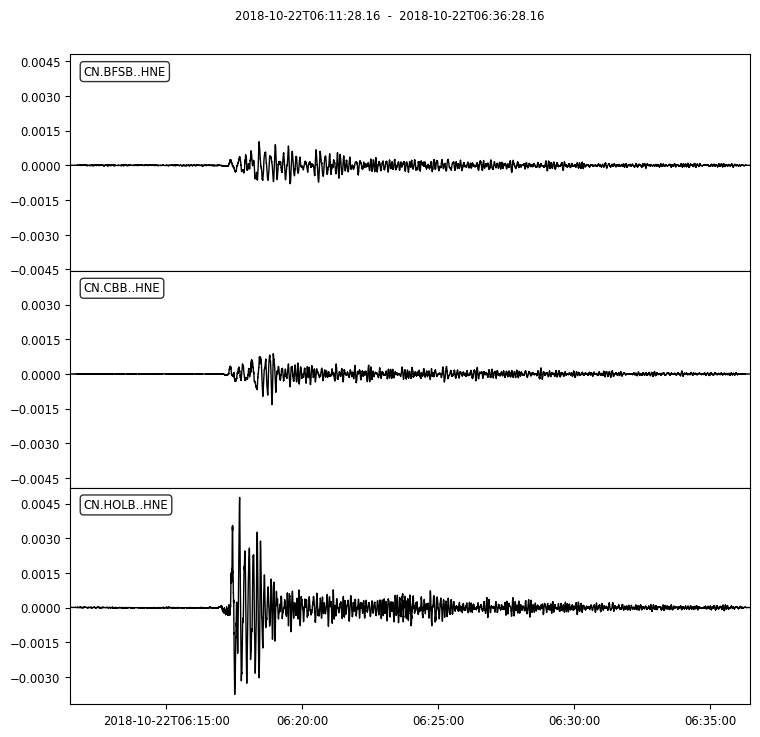

In [16]:
op = stream.plot()

In [9]:
length = 20*60*100 # 20 minutes from start

In [19]:
'''
Methods to Write TS Data into csv

Layout

Time x Sensor
'''

# Write a File
mult = 10000
with open("eq_data.csv","w") as f:
    for i in tqdm(range(length)):
        f.write("{} {} {}\n".format(stream[0].data[i]*mult,stream[1].data[i]*mult,stream[2].data[i]*mult))

  0%|          | 0/120000 [00:00<?, ?it/s]

In [20]:
'''
Dummy Relations File
'''
nodes = 3
with open("eq_data_relations.csv","w") as f:
    for i in range(nodes):
        for j in range(nodes):
            f.write("{} ".format(1.0))
        f.write("\n")